College Admission Analysis
=== 

I got this dataset from [FiveThirtyEight GitHub](https://github.com/fivethirtyeight/data/tree/master/college-majors).

I'm interested in the type of analysis one could extract from college admissions data. Some of the questions I asked are as follows:

1. **Volume of gender per major (graph)**
+ **What are the top major choices for women and men?**

    >I'm guessing for men revolves around engineering while women might revolve around Health/Social Services/Education

+ __What is the highest paid major?__

    >I'm guessing it exists in STEM

+ __What is the probability you are unemployed based on major?__

    >The more creative the major, the less it pays


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('recent-grads.csv')

df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [11]:
#1. Volume of gender per major (graph)

df_1 = df[['Major_category','Men', 'Women']]
df_1['Percentage_women'] = df_1['Women']/ (df_1['Men'] + df_1['Women'])
grouped = df_1.groupby('Major_category').Percentage_women.mean()
grouped.head()


C:\Users\badhairdude\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Major_category
Agriculture & Natural Resources    0.405267
Arts                               0.603658
Biology & Life Science             0.587193
Business                           0.483198
Communications & Journalism        0.658384
Name: Percentage_women, dtype: float64

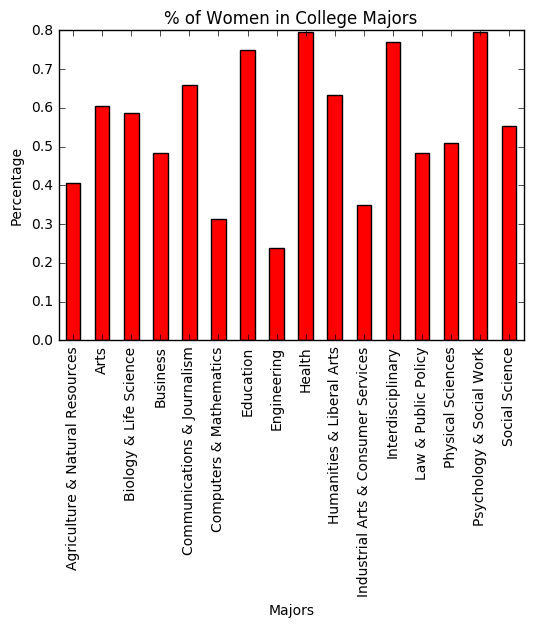

In [12]:
%matplotlib inline

ax = grouped.plot(title = '% of Women in College Majors', kind='bar', color = 'r')
ax.set_xlabel("Majors")
ax.set_ylabel("Percentage")
#add percentage/set y axis to 1 to 100

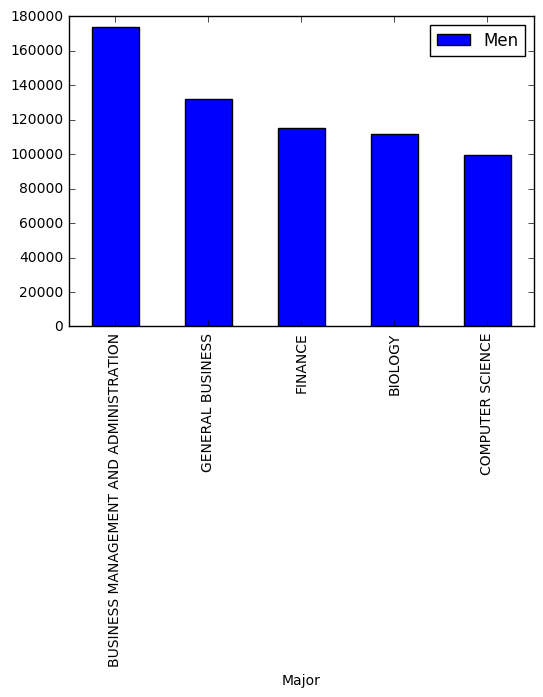

In [39]:
#2. What are the top major choices for women and men?

df_men = df[['Major', "Men"]].sort_values(['Men'], ascending = False, inplace = False)


%matplotlib inline

df_men.set_index('Major').head().plot(kind='bar')



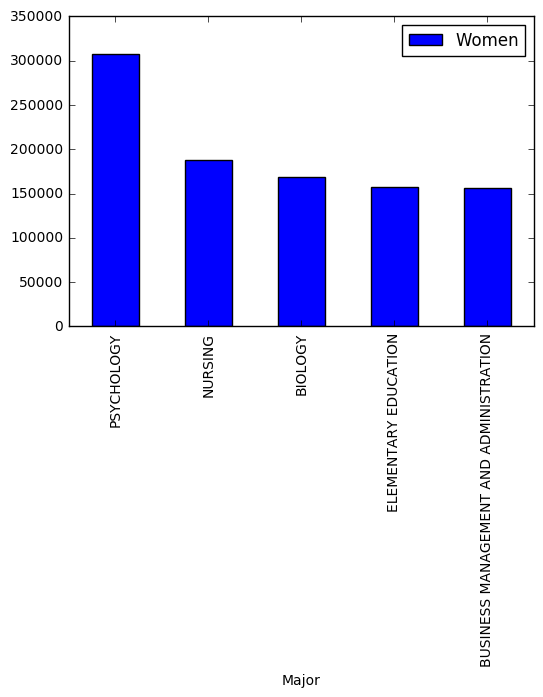

In [44]:
df_women = df[['Major', 'Women']].sort_values(['Women'], ascending = False, inplace = False)


df_women.head()
df_women.set_index(df_women['Major']).head().plot(kind = 'bar')

In [58]:
# 3.What is the highest paid major?
df[df['Median'] == df['Median'].max()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
